In [1]:
import networkx as nx
import pandas as pd
import pickle
import numpy as np

In [2]:
# Load base document graph
with open('../data/base_document_graph.pkl', 'rb') as f:
    G = pickle.load(f)


# Load entites' dictionary
with open('../data/multihop_dataset_filtered_entities.pkl', 'rb') as f:
    entities = pickle.load(f)

In [3]:
# Get node types and edge relations counts
node_types = [G.nodes[node]['type'] for node in G.nodes()]
edge_relations = [G.edges[edge]['relation'] for edge in G.edges()]

print("\n=== GRAPH STATISTICS ===")
print(f"1. Total nodes: {G.number_of_nodes()}")
print(f"2. Total edges: {G.number_of_edges()}")

print("\n3. Nodes by type:")
for node_type in set(node_types):
    count = node_types.count(node_type)
    print(f"   - {node_type}: {count} nodes")

print("\n4. Edges by relation:")
for relation in set(edge_relations):
    count = edge_relations.count(relation)
    print(f"   - {relation}: {count} edges")


=== GRAPH STATISTICS ===
1. Total nodes: 2624
2. Total edges: 10427

3. Nodes by type:
   - article: 609 nodes
   - category: 6 nodes
   - chunk: 1660 nodes
   - author: 300 nodes
   - source: 49 nodes

4. Edges by relation:
   - WRITES_ABOUT: 308 edges
   - COVERED_BY_AUTHOR: 308 edges
   - WRITTEN_BY: 600 edges
   - PUBLISHED_IN: 609 edges
   - CONTRIBUTED_BY: 319 edges
   - COVERS: 58 edges
   - PREVIOUS_CHUNK: 1051 edges
   - COVERED_IN: 609 edges
   - CLASSIFIED_WITHIN: 609 edges
   - AUTHORED: 600 edges
   - BELONGS_TO: 1660 edges
   - CONTAINS: 1660 edges
   - PUBLISHES: 609 edges
   - NEXT_CHUNK: 1051 edges
   - CONTRIBUTES_TO: 318 edges
   - COVERED_BY_SOURCE: 58 edges


In [4]:
# Iterate through each entity tuple in the entities list
for entity_name, entity_type, article_ids in entities:
    # Create a new node for the entity with its type attribute
    # The node ID will be the entity name
    # The type attribute will be formatted as "entity_{entity_type}"
    G.add_node(entity_name, type=f"entity_{entity_type}")
    
    # For each article ID where this entity is referenced
    for article_id in article_ids:
        # Add a directed edge from the entity to the article
        # This represents that the entity is referenced in this article
        G.add_edge(entity_name, article_id, relation="REFERENCED_IN")
        
        # Add a directed edge from the article to the entity
        # This represents that the article references this entity
        G.add_edge(article_id, entity_name, relation="REFERENCES")

In [5]:
# Get node types and edge relations counts
node_types = [G.nodes[node]['type'] for node in G.nodes()]
edge_relations = [G.edges[edge]['relation'] for edge in G.edges()]

print("\n=== GRAPH STATISTICS ===")
print(f"1. Total nodes: {G.number_of_nodes()}")
print(f"2. Total edges: {G.number_of_edges()}")

print("\n3. Nodes by type:")
for node_type in set(node_types):
    count = node_types.count(node_type)
    print(f"   - {node_type}: {count} nodes")

print("\n4. Edges by relation:")
for relation in set(edge_relations):
    count = edge_relations.count(relation)
    print(f"   - {relation}: {count} edges")


=== GRAPH STATISTICS ===
1. Total nodes: 3358
2. Total edges: 15813

3. Nodes by type:
   - entity_LOC: 89 nodes
   - article: 609 nodes
   - entity_PER: 338 nodes
   - category: 6 nodes
   - chunk: 1660 nodes
   - author: 299 nodes
   - entity_ORG: 308 nodes
   - source: 49 nodes

4. Edges by relation:
   - WRITES_ABOUT: 308 edges
   - COVERED_BY_AUTHOR: 308 edges
   - WRITTEN_BY: 600 edges
   - PUBLISHED_IN: 609 edges
   - CONTRIBUTED_BY: 319 edges
   - COVERS: 58 edges
   - REFERENCES: 2693 edges
   - PREVIOUS_CHUNK: 1051 edges
   - COVERED_IN: 609 edges
   - CLASSIFIED_WITHIN: 609 edges
   - AUTHORED: 600 edges
   - REFERENCED_IN: 2693 edges
   - CONTAINS: 1660 edges
   - PUBLISHES: 609 edges
   - BELONGS_TO: 1660 edges
   - NEXT_CHUNK: 1051 edges
   - CONTRIBUTES_TO: 318 edges
   - COVERED_BY_SOURCE: 58 edges


In [6]:
with open("../data/base_hybrid_graph.pkl", "wb") as f:
    pickle.dump(G, f)
    print("Graph saved!")

Graph saved!


## Exploring the graph

In [7]:
import matplotlib.pyplot as plt

In [8]:
def visualize_node_neighbors(G, node_id):
    """
    Visualizes the neighborhood of a given node in a NetworkX graph.

    This function extracts a subgraph containing the specified node and all its directly 
    connected neighbors, then visualizes it using Matplotlib. The selected node is highlighted 
    in red, while its neighbors are displayed in light blue. If the graph is directed, 
    arrows indicate edge direction.

    Parameters:
    -----------
    G : networkx.Graph or networkx.DiGraph
        The input graph where the node and its neighbors exist.
    node_id : str or int
        The identifier of the node whose neighborhood is to be visualized.

    Returns:
    --------
    None
        Displays a Matplotlib plot of the subgraph.
    """
    if node_id not in G:
        print(f"Node '{node_id}' not found in the graph.")
        return
    
    # Create a subgraph with the node and its neighbors
    neighbors = list(G.neighbors(node_id))  # Get all connected nodes
    subgraph_nodes = [node_id] + neighbors  # Include the target node
    subgraph = G.subgraph(subgraph_nodes)   # Create subgraph

    # Draw the subgraph
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(subgraph, seed=42)  # Layout for better visualization
    nx.draw(subgraph, pos, with_labels=True, node_size=800, node_color="lightblue", edge_color="gray", font_size=8)
    nx.draw_networkx_edges(subgraph, pos, arrowstyle="->", arrowsize=15)

    # Highlight the selected node in red
    nx.draw_networkx_nodes(subgraph, pos, nodelist=[node_id], node_color="red", node_size=1000)

    plt.title(f"Neighborhood of Node: {node_id}")
    plt.show()

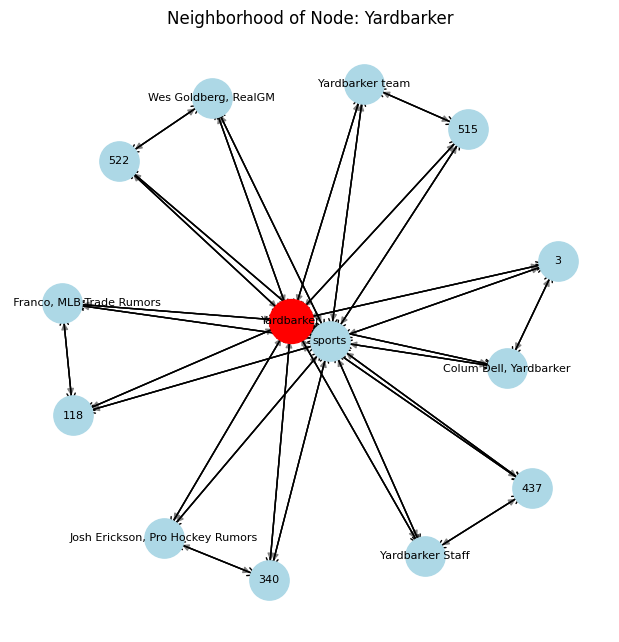

In [9]:
# Example 1: Visualize neighborhood.
visualize_node_neighbors(G, "Yardbarker") 

In [10]:
# Replace 'node_name' with the actual node you want to inspect
node_name = "Engadget"

print(f"\n=== EDGES CONNECTED TO NODE: {node_name} ===")
print("\nOutgoing edges:")
for edge in G.out_edges(node_name):
    print(f"  {node_name} -> {edge[1]} (relation: {G.edges[edge]['relation']})")

print("\nIncoming edges:")
for edge in G.in_edges(node_name):
    print(f"  {edge[0]} -> {node_name} (relation: {G.edges[edge]['relation']})")

# Optional: Print summary counts
print(f"\nSummary: {len(list(G.out_edges(node_name)))} outgoing, {len(list(G.in_edges(node_name)))} incoming edges")


=== EDGES CONNECTED TO NODE: Engadget ===

Outgoing edges:
  Engadget -> 50 (relation: PUBLISHES)
  Engadget -> 77 (relation: PUBLISHES)
  Engadget -> 91 (relation: PUBLISHES)
  Engadget -> 99 (relation: PUBLISHES)
  Engadget -> 104 (relation: PUBLISHES)
  Engadget -> 169 (relation: PUBLISHES)
  Engadget -> 222 (relation: PUBLISHES)
  Engadget -> 229 (relation: PUBLISHES)
  Engadget -> 234 (relation: PUBLISHES)
  Engadget -> 250 (relation: PUBLISHES)
  Engadget -> 287 (relation: PUBLISHES)
  Engadget -> 312 (relation: PUBLISHES)
  Engadget -> 313 (relation: PUBLISHES)
  Engadget -> 404 (relation: PUBLISHES)
  Engadget -> 417 (relation: PUBLISHES)
  Engadget -> 505 (relation: PUBLISHES)
  Engadget -> 524 (relation: PUBLISHES)
  Engadget -> 567 (relation: PUBLISHES)
  Engadget -> 595 (relation: PUBLISHES)
  Engadget -> Amy Skorheim (relation: CONTRIBUTED_BY)
  Engadget -> Andrew Tarantola (relation: CONTRIBUTED_BY)
  Engadget -> Engadget team (relation: CONTRIBUTED_BY)
  Engadget -> Igo